In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
np.random.seed(21)

In [4]:
from scipy.stats import pearsonr,spearmanr

In [6]:
corr = 0.75
covs = [[1,corr],[corr,1]]
means = [0,0]

d1,d2 = np.random.multivariate_normal(means,covs,1000).T

In [7]:
r_val,p_val = pearsonr(d1,d2)

In [8]:
print("The correlation coefficient is {:1.4f} with a p-value of {:1.2f}.".format(r_val, p_val))

The correlation coefficient is 0.7732 with a p-value of 0.00.


In [9]:
# Calculate the spearman rank correlation between our data
r_val, p_val = spearmanr(d1, d2)

# Check the results of the spearman correlation
print("The correlation coefficient is {:1.4f} with a p-value of {:1.2f}.".format(r_val, p_val))

The correlation coefficient is 0.7595 with a p-value of 0.00.


In [10]:
from scipy.stats import ttest_ind

In [11]:
# Settings for data simulation
n_samples = 250

# Simulate some data
d1 = norm.rvs(loc=0.5, scale=1, size=n_samples)
d2 = norm.rvs(loc=0.75, scale=1, size=n_samples)

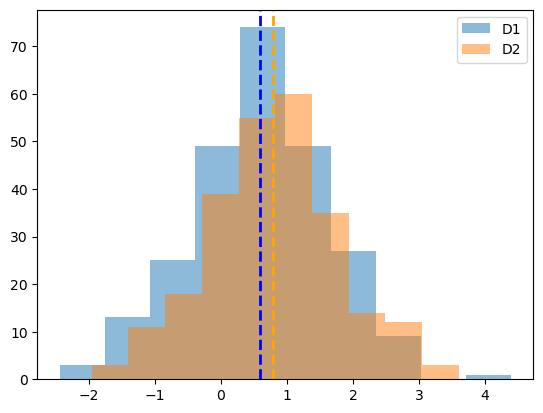

In [12]:
# Visualize our data comparison
plt.hist(d1, alpha=0.5, label='D1');
plt.axvline(np.mean(d1), linestyle='--', linewidth=2, color='blue')
plt.hist(d2, alpha=0.5, label='D2');
plt.axvline(np.mean(d2), linestyle='--', linewidth=2, color='orange')
plt.legend();

In [13]:
# Run independent samples t-test
t_val, p_val = ttest_ind(d1, d2)

In [14]:
# Check the results of the t-test
print('T-Test comparison of D1 & D2:')
print('\tT-value \t {:1.4f}'.format(t_val))
print('\tP-value \t {:1.2e}'.format(p_val))

T-Test comparison of D1 & D2:
	T-value 	 -2.2502
	P-value 	 2.49e-02


In [15]:
from math import sqrt
from statistics import mean, stdev

def compute_cohens_d(data_1, data_2):
    """Compute cohens-d effect size.
    
    Parameters
    ----------
    data_1, data_2 : 1d array
        Array of data to compute the effect size between.
        
    Returns
    -------
    cohens_d : float
        The computed effect size measure. 
    """

    # Calculate group means
    d1_mean = mean(data_1)
    d2_mean = mean(data_2)
    
    # Calculate group standard deviations
    d1_std = stdev(data_1)
    d2_std = stdev(data_2)
    
    # Calculate the pooled standard deviation
    pooled_std = sqrt((d1_std ** 2 + d2_std ** 2) / 2)
    
    # Calculate cohens-d
    cohens_d = (d1_mean - d2_mean) / pooled_std

    return cohens_d

In [16]:
# Calculate the cohens-d effect size for our simulated data from before
cohens_d = compute_cohens_d(d2, d1)

In [17]:
# Check the measured value of the effect size
print('The cohens-d effect size is {:1.2f}.'.format(cohens_d))

The cohens-d effect size is 0.20.
